# Oil Production Prediction Project. 

> **Problem Statement** : To Develop a Regression Model that takes Operational parameters as inputs and provides Oil-Production Rates as Outputs.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
og= pd.read_csv('https://raw.githubusercontent.com/Divyanshu-ISM/Machine-Learning-Deep-Learning/main/Volve%20P-12_DatesCorrected.csv')

In [3]:
og.head(20)

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2007-01-14,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2007-01-15,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2007-01-16,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2007-01-17,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2007-01-18,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
og.rename(columns={'Unnamed: 0':'Dates'},inplace=True)

In [16]:
og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Dates                           3291 non-null   object 
 1   onstreaminject_HRS              3291 non-null   float64
 2   BORE_WI_VOL                     3291 non-null   int64  
 3   ON_STREAM_HRS                   3291 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 6   AVG_DP_TUBING                   3291 non-null   float64
 7   AVG_ANNULUS_PRESS               3291 non-null   float64
 8   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 9   AVG_WHP_P                       3291 non-null   float64
 10  AVG_WHT_P                       3291 non-null   float64
 11  DP_CHOKE_SIZE                   3291 non-null   float64
 12  BORE_OIL_VOL                    32

In [18]:
output_co= 'BORE_OIL_VOL'

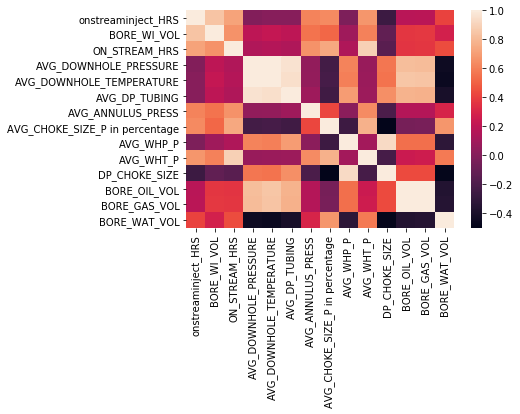

In [19]:
sns.heatmap(og.corr())

In [25]:
og.corr(method='kendall')

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
onstreaminject_HRS,1.000000,0.547759,0.692921,-0.050171,0.024472,0.022556,0.368982,0.456988,-0.018866,0.372515,-0.061203,0.229428,0.231272,0.372981
BORE_WI_VOL,0.547759,1.000000,0.461853,0.186652,0.226356,0.163018,0.301942,0.240227,0.138669,0.217124,0.101933,0.311748,0.318708,0.186180
ON_STREAM_HRS,0.692921,0.461853,1.000000,0.070335,0.117241,0.112858,0.388409,0.514923,0.085047,0.425601,0.040022,0.410243,0.413024,0.414955
AVG_DOWNHOLE_PRESSURE,-0.050171,0.186652,0.070335,1.000000,0.828740,0.636959,-0.011289,-0.270574,0.536251,-0.164017,0.533801,0.481139,0.484079,-0.329743
AVG_DOWNHOLE_TEMPERATURE,0.024472,0.226356,0.117241,0.828740,1.000000,0.655386,0.070573,-0.152629,0.442087,-0.081410,0.436103,0.539584,0.534538,-0.240461
AVG_DP_TUBING,0.022556,0.163018,0.112858,0.636959,0.655386,1.000000,0.098721,-0.260899,0.823152,0.003726,0.742825,0.582118,0.575757,-0.170600
AVG_ANNULUS_PRESS,0.368982,0.301942,0.388409,-0.011289,0.070573,0.098721,1.000000,0.161860,0.016960,0.210566,-0.003727,0.173166,0.166601,0.226896
AVG_CHOKE_SIZE_P in percentage,0.456988,0.240227,0.514923,-0.270574,-0.152629,-0.260899,0.161860,1.000000,-0.354425,0.519177,-0.416663,-0.016478,-0.012895,0.554900
AVG_WHP_P,-0.018866,0.138669,0.085047,0.536251,0.442087,0.823152,0.016960,-0.354425,1.000000,-0.102073,0.900504,0.564536,0.560712,-0.262243
AVG_WHT_P,0.372515,0.217124,0.425601,-0.164017,-0.081410,0.003726,0.210566,0.519177,-0.102073,1.000000,-0.153276,0.104242,0.108351,0.685157


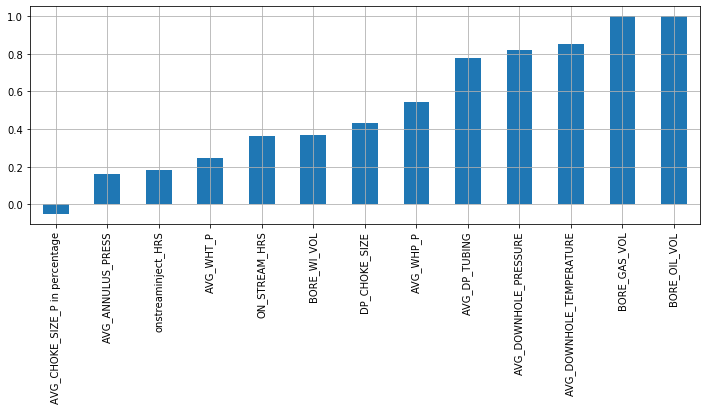

In [30]:
og.corr()[output_co].sort_values(ascending=True)[1:].plot(kind='bar', figsize=(12,4), grid=True)

In [32]:
corr_og = pd.DataFrame(og.corr()[output_co].sort_values(ascending=False)[1:])
corr_og.columns=['Corr']

In [33]:
corr_og

,Corr
BORE_GAS_VOL,0.998661
AVG_DOWNHOLE_TEMPERATURE,0.850241
AVG_DOWNHOLE_PRESSURE,0.819920
AVG_DP_TUBING,0.778941
AVG_WHP_P,0.544204
DP_CHOKE_SIZE,0.434375
BORE_WI_VOL,0.368739
ON_STREAM_HRS,0.361124
AVG_WHT_P,0.245750
onstreaminject_HRS,0.182405


In [36]:
input_co= corr_og[(abs(corr_og['Corr'])>0.2) & (corr_og['Corr']<0.90)].index

In [37]:
input_co

Index(['AVG_DOWNHOLE_TEMPERATURE', 'AVG_DOWNHOLE_PRESSURE', 'AVG_DP_TUBING',
       'AVG_WHP_P', 'DP_CHOKE_SIZE', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_WHT_P', 'BORE_WAT_VOL'],
      dtype='object')

In [38]:
x= og[input_co]; y= og[output_co]

In [39]:
x.shape, y.shape

((3291, 9), (3291,))

In [41]:
train_length = 3000 #Days

x_train , y_train = x.iloc[:train_length,:] , y[:train_length]

x_test , y_test = x.iloc[train_length:, :] , y[train_length:]

In [45]:
x_train.shape , x_test.shape,y_train.shape , y_test.shape

((3000, 9), (291, 9), (3000,), (291,))

# Regression Model

## 1.Multiple Linear Regression Model

In [43]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [44]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [48]:
lm.fit(x_train_scaled , y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
yp_train = lm.predict(x_train_scaled)

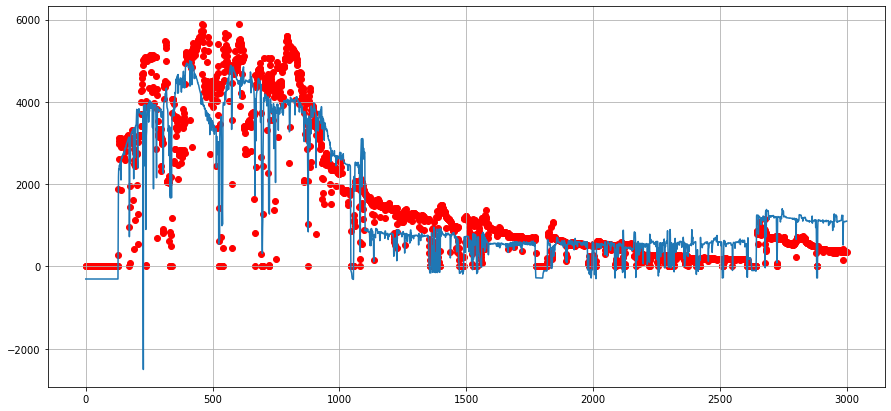

In [52]:
plt.figure(figsize=(15,7))

plt.scatter(og.index[:train_length] , y_train, color='red')
plt.plot(og.index[:train_length] , yp_train)

plt.grid()

In [53]:
yp_test = lm.predict(x_test_scaled)

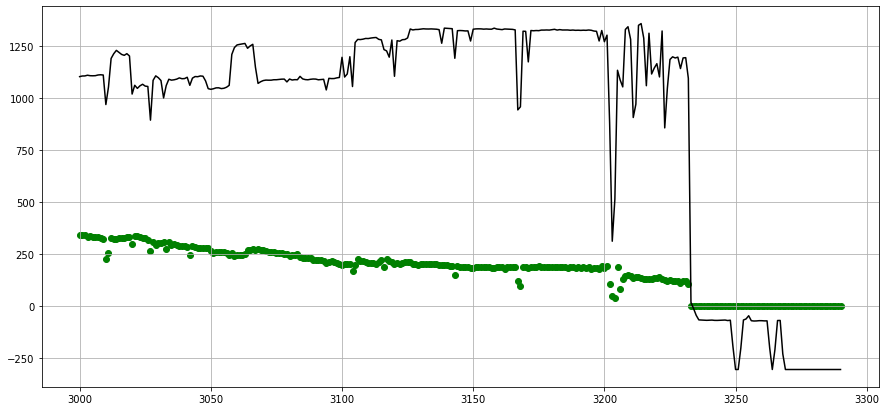

In [55]:
plt.figure(figsize=(15,7))


plt.scatter(og.index[train_length:] , y_test, color='green')
plt.plot(og.index[train_length:] , yp_test, color='black')





plt.grid()


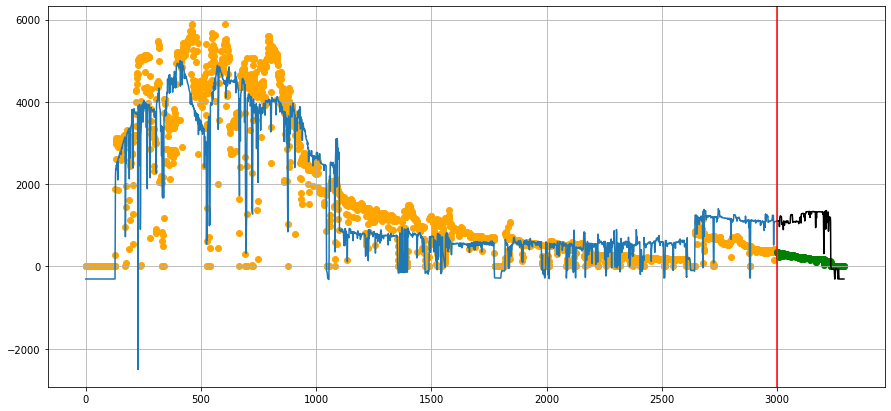

In [56]:
plt.figure(figsize=(15,7))
plt.scatter(og.index[:train_length] , y_train, color='orange')
plt.plot(og.index[:train_length] , yp_train)

plt.scatter(og.index[train_length:] , y_test, color='green')
plt.plot(og.index[train_length:] , yp_test, color='black')


plt.axvline(og.index[train_length], color='red')


plt.grid()

## 2.RandomForest Regressor Model

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(x_train, y_train)

yp_train = rf.predict(x_train)

yp_test = rf.predict(x_test)

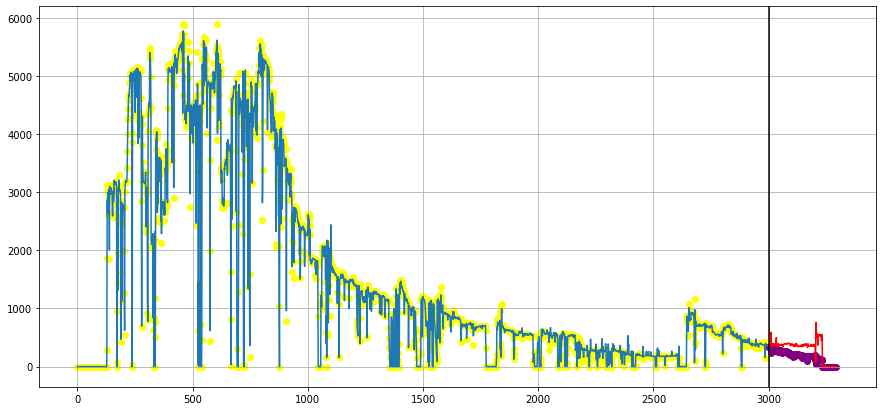

In [61]:
plt.figure(figsize=(15,7))

plt.scatter(og.index[:train_length] , y_train, color='yellow')
plt.plot(og.index[:train_length] , yp_train)

plt.scatter(og.index[train_length:] , y_test, color='purple')
plt.plot(og.index[train_length:] , yp_test, color='red')


plt.axvline(og.index[train_length], color='black')


plt.grid()